# SUPPORT VECTOR MACHINE (SVM)

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary
classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You
may want to tune the hyperparameters using small validation sets to speed up the
process. What accuracy can you reach?

NB: This exercise was gotten from "Hands on Machine Learning by Aurelien Geron" (Chapter 5)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score,accuracy_score

In [2]:
# Import MNIST data
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# Seperate the labels and target using the keys
x_data , y_target = mnist['data'] , mnist['target']

In [4]:
#determine the shape of x_data
x_data.shape

(70000, 784)

In [5]:
#determine the shape of y_target
y_target.shape

(70000,)

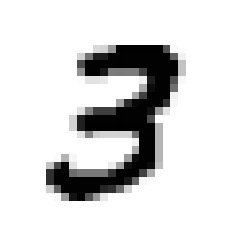

In [6]:
# The Images in this dataset has 784 features (28x28 pixels)
# We can visuaize an image, by reshaping
sample_digit = x_data[7]
sample_image = sample_digit.reshape(28,28)

plt.imshow(sample_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
# standardize the data
scaler = StandardScaler()
X_data = scaler.fit_transform(x_data)

# Split the data into trian and test
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=50)

In [8]:
# Tune SVM Hyperparmeters using Grid search
param_grid = [
    {
        'C':[0.01,0.1,1,10]
    }
]

model = svm.SVC(random_state=50,gamma='auto',kernel='rbf')

grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=False) #scoring='accuracy', return_train_score=True

grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=50, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid=[{'C': [0.01, 0.1, 1, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
grid_search.best_params_

{'C': 10}

In [10]:
grid_search.best_score_

0.9704464285714286

In [11]:
# Predict the test data
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

# Compute the confusion matrix
confusion_matrix(Y_test,y_pred)

array([[1334,    1,    2,    1,    0,    2,    5,    4,    3,    2],
       [   0, 1527,    7,    0,    1,    0,    1,    5,    4,    2],
       [   1,    1, 1365,    7,    5,    0,    3,   12,   10,    1],
       [   1,    0,    9, 1444,    2,    9,    0,   17,    9,    4],
       [   3,    4,    7,    1, 1273,    2,    2,    7,    1,   10],
       [   1,    0,    3,   16,    0, 1257,    5,   13,    2,    5],
       [   4,    2,    5,    1,    1,    7, 1338,   14,    2,    0],
       [   2,    9,    5,    0,    5,    1,    0, 1404,    0,    8],
       [   4,    7,    8,    6,   10,    8,    3,    4, 1282,    2],
       [   1,    3,    8,    6,   19,    4,    0,   20,    4, 1380]],
      dtype=int64)

In [14]:
# Compute Precision, Recall, F1 score and accuracy
precision = precision_score(Y_test,y_pred,average='macro')
recall = recall_score(Y_test,y_pred,average='macro')
F1_score = f1_score(Y_test,y_pred,average='macro')
accuracy = accuracy_score(Y_test,y_pred)

print('Precision: ',precision)
print('Recall: ',recall)
print('F1_score: ',F1_score)
print('Accuracy: ',accuracy)

Precision:  0.971946776365907
Recall:  0.9715826168816623
F1_score:  0.9716896835460626
Accuracy:  0.9717142857142858
